In [12]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tifffile import imread, memmap

from caImageAnalysis import BrukerFish
from caImageAnalysis.utils import rotate_image
from caImageAnalysis.visualize import visualize_images, visualize_volumes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Batch analysis - DOI

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:202: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 202 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  log = file.read()
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:230: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different 

no voltage output or markpoints detected
no voltage output or markpoints detected


/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:349: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:202: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 202 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  log = file.read()
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site

no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected
no voltage output or markpoints detected


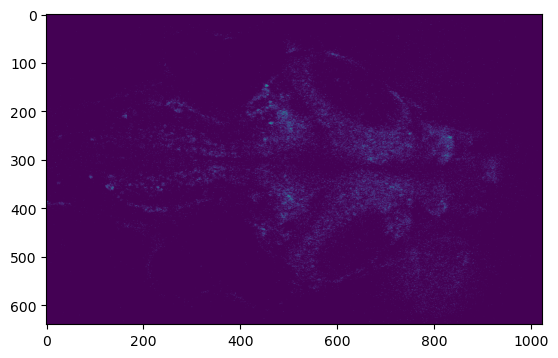

In [13]:
# Change this path to the experiment folder
exp_folders = ['elavl3H2BGCaMP8m_6dpf_DOI_50ugml_42_20240916', 'elavl3H2BGCaMP8m_6dpf_DOI_50ugml_43_20240923', 'elavl3H2BGCaMP8m_6dpf_DOI_50ugml_44_20240923',
			   'elavl3H2BGCaMP8m_9dpf_DOI_50ugml_45_20240926', 'elavl3H2BGCaMP8m_9dpf_DOI_50ugml_46_20240926']

for exp_f in exp_folders:
	exp_folder = rf'/Volumes/DOI/Bruker/{exp_f}'
	region = 'planes11-15_pre'
	gavage = False
	sidestim = False
	anatomy = 'anatomystack'

	# Initialize BrukerFish
	fish = BrukerFish(exp_folder, region=region, gavage=gavage, anatomy=anatomy)

	# If running for the first time, create a combined frametimes.txt and combined tif files
	fish.create_frametimes_txt()
	fish.combine_channel_images('Ch2')

	region = 'planes11-15_post'
	fish = BrukerFish(exp_folder, region=region, gavage=gavage, anatomy=anatomy)
	fish.create_frametimes_txt()
	fish.combine_channel_images('Ch2')

	# If a single imaging session consists of multiple "region"s, combine the combined tif files and the frametimes txts here.
	# If this is a GUT SIDE PHOTOSTIMULATION experiment, DON'T COMBINE THEM HERE
	regions = ['planes11-15_pre', 'planes11-15_post']
	fish.combine_regions(regions, remove_region_files=True, file_prefix=region[:region.rfind('_')])

	region = 'planes11-15'
	fish = BrukerFish(exp_folder, region=region, gavage=gavage, anatomy=anatomy)

	# Split the raw volumetric image to individual planes
	# If it's not volumetric, creates a frametimes.h5 file in the exp_path
	if fish.volumetric:
		if sidestim:
			fish.split_bruker_volumes('Ch2', overwrite=False)
		else:
			fish.split_bruker_volumes('Ch2')
	else:
		frametimes = fish.frametimes_df.copy()
		frametimes.reset_index(drop=True)
		if len(fish.region) > 0:
			frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')
		else:
			frametimes.to_hdf(os.path.join(fish.exp_path, f'frametimes.h5'), 'frametimes')
		fish.process_filestructure()

### Change the exp_folder to the path of the experiment

In [54]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818'
region = 'hindbrain'
gavage = True
sidestim = False
anatomy = ''

In [55]:
# Initialize BrukerFish
fish = BrukerFish(exp_folder, region=region, gavage=gavage, anatomy=anatomy)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:202: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 202 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML pars

{'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000'),
 'anatomy': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000_Cycle01175_Ch2_000001.ome.tif'),
 'log': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000.xml'),
 'voltage_output': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000_Cycle00001_VoltageOutput_001.xml'),
 'references': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/References')}

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:230: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 230 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)


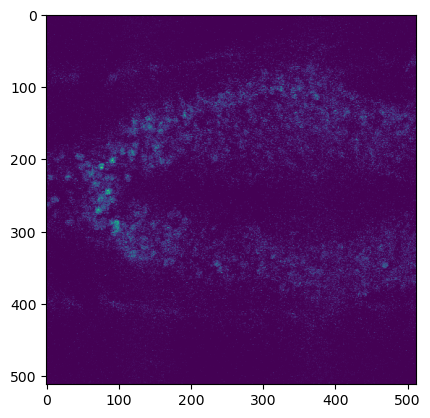

In [56]:
# If running for the first time, create a combined frametimes.txt and combined tif files
fish.create_frametimes_txt()
fish.combine_channel_images('Ch2')

### If you have any phase offset problems, stop here and run the 0.5_fix_phase.ipynb

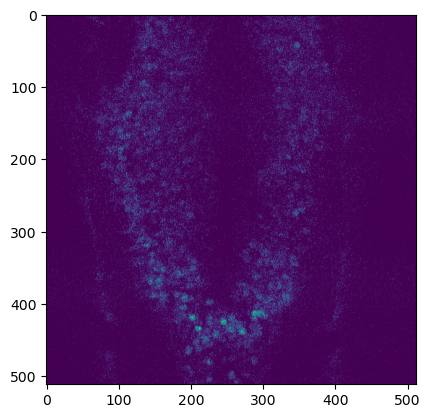

In [57]:
# Check the combined image. If needed, rotate the raw image by angle.
# For long recordings (~15 GB of image), don't rotate. The kernel crashes.
if (not sidestim and 'markpoints' in fish.data_paths.keys()) or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    if 'vagal_L' in fish.data_paths['raw'].name:
        angle = 180
    else:
        angle = 90

    fish.rotate_image(fish.data_paths['raw_image'], angle=angle)

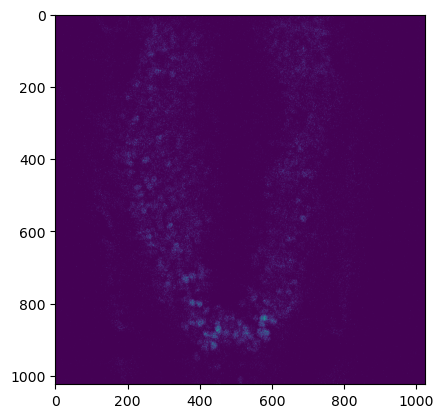

In [58]:
# When the rotation angle is accurate, also rotate and create the anatomy.tif stack
# For long recordings, don't rotate the anatomy to match the combined image.
if (not sidestim and 'markpoints' in fish.data_paths.keys()) or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    anatomy_img = imread(fish.data_paths['anatomy'])
    anatomy_img_rotated = rotate_image(anatomy_img, path=fish.exp_path.joinpath('anatomy.tif'), angle=angle)
    fish.process_filestructure()

    plt.imshow(anatomy_img_rotated[0])

### If pre and post are separate imaging sessions, combine them

In [59]:
# If a single imaging session consists of multiple "region"s, combine the combined tif files and the frametimes txts here.
# If this is a GUT SIDE PHOTOSTIMULATION experiment, DON'T COMBINE THEM HERE
# regions = ['vagal_L_proximal', 'vagal_L_mid', 'vagal_L_distal']

# fish.combine_regions(regions, remove_region_files=True, file_prefix=region[:region.rfind('_')])

### Split to planes

In [60]:
# Split the raw volumetric image to individual planes
# If it's not volumetric, creates a frametimes.h5 file in the exp_path
if fish.volumetric:
	if sidestim:
		fish.split_bruker_volumes('Ch2', overwrite=False)
	else:
		fish.split_bruker_volumes('Ch2')
else:
    frametimes = fish.frametimes_df.copy()
    frametimes.reset_index(drop=True)
    if len(fish.region) > 0:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')
    else:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'frametimes.h5'), 'frametimes')
    fish.process_filestructure()

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:349: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  plane_frametimes.to_hdf(os.path.join(plane_folder_path, 'frametimes.h5'), 'frametimes')


In [61]:
fish.frametimes_df

,time,pulse
0,15:28:46,0
1,15:28:46.153384,0
2,15:28:46.306768,0
3,15:28:46.460152,0
4,15:28:46.613535,0
...,...,...
5865,15:43:45.596409,5
5866,15:43:45.749793,5
5867,15:43:45.903177,5
5868,15:43:46.056561,5


## Visualize plane(s)

In [62]:
if fish.volumetric:
    iw = visualize_volumes(fish)
else:
    img = memmap(fish.data_paths['raw_image'])
    iw = visualize_images(imgs=img)

iw.show()

RFBOutputContext()

No such comm: 1e21218059624441a6f47be8da71276e
No such comm: 1e21218059624441a6f47be8da71276e


In [63]:
iw.plot.canvas.close()

### If this is a gavage experiment and there are missed injections, check your volume and find the missing injection. Then delete your volumes and frametimes.txt file. Re-run the cells below with the correct pulse to be removed.

In [102]:
remove_pulses = [5]  # with first pulse being 1

In [103]:
fish = BrukerFish(exp_folder, region=region, remove_pulses=remove_pulses, gavage=gavage, anatomy=anatomy)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:202: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 202 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML pars

{'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/hindbrain-000'),
 'raw_image': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/hindbrain_ch2.tif'),
 'rotated': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/raw_rotated.tif'),
 'anatomy': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/anatomy.tif'),
 'log': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/hindbrain-000/hindbrain-000.xml'),
 'voltage_output': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/hindbrain-000/hindbrain-000_Cycle00001_VoltageOutput_001.xml'),
 'references': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_8dpf_fed_glycine_25mM_76_20240814/hindbrain-000/References')}

In [104]:
fish.create_frametimes_txt()

if fish.volumetric:
    fish.split_bruker_volumes('Ch2')
else:
    frametimes = fish.frametimes_df.copy()
    frametimes.reset_index(drop=True)
    if len(fish.region) > 0:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')
    else:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'frametimes.h5'), 'frametimes')
    fish.process_filestructure()
    
fish.frametimes_df

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:230: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 230 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(log)
/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:349: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  plane_frametimes.to_hdf(os.path.join(plane_folder_pa

,time,pulse
0,17:14:34,0
1,17:14:34.153384,0
2,17:14:34.306768,0
3,17:14:34.460152,0
4,17:14:34.613535,0
...,...,...
5865,17:29:33.596386,4
5866,17:29:33.074977,4
5867,17:29:33.903154,4
5868,17:29:34.056537,4


### If this is a photostimulation experiment, remove the shutter artifacts

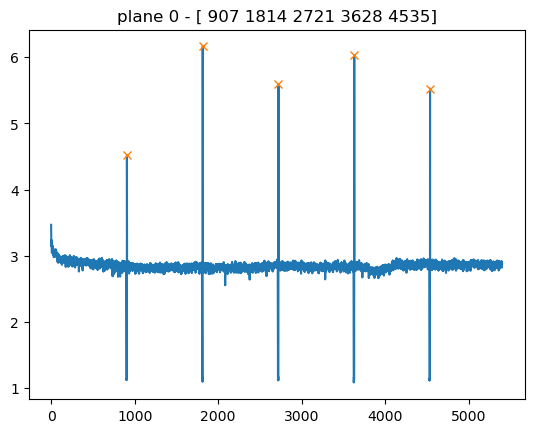

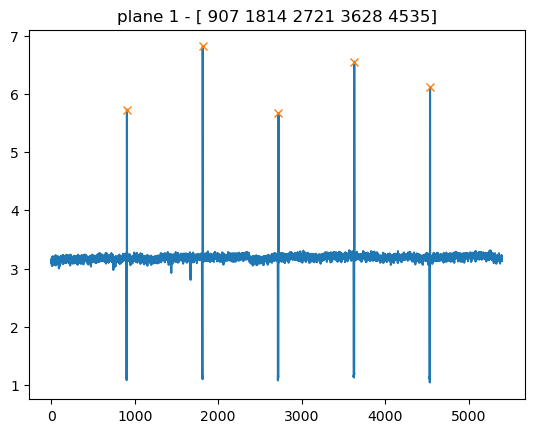

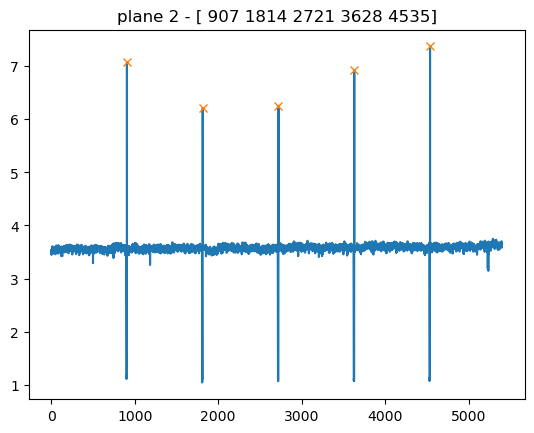

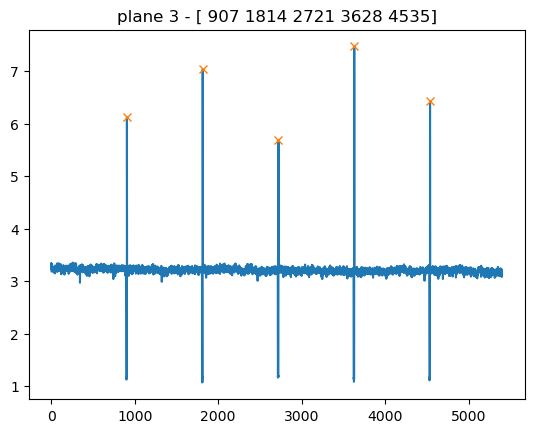

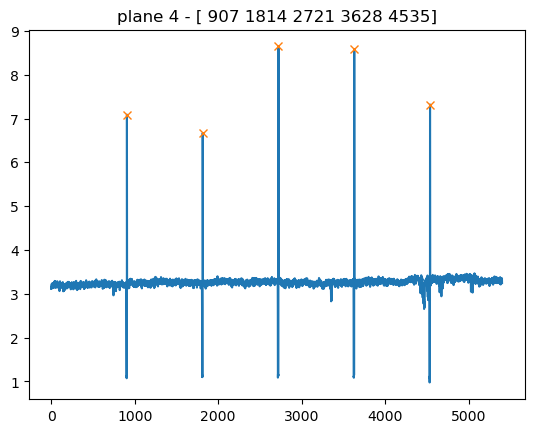

In [116]:
from scipy.signal import find_peaks
import tifffile

# find bright shutter points
if sidestim:
	for plane in fish.data_paths["volumes"]:
		img = tifffile.memmap(fish.data_paths["volumes"][plane]["image"])
		avg_F = np.mean(img, axis=(1, 2))
		peaks, _ = find_peaks(avg_F, distance=2, threshold=1.5)

		plt.figure()
		plt.plot(avg_F)
		plt.plot(peaks, avg_F[peaks], "x", label='shutter')
		plt.title(f'plane {plane} - {peaks}')

In [117]:
# remove the shutter artifacts
n_frames = 8

if sidestim:
	for plane in fish.data_paths["volumes"]:
		img = tifffile.memmap(fish.data_paths["volumes"][plane]["image"])
		ft = pd.read_hdf(fish.data_paths["volumes"][plane]["frametimes"])

		avg_F = np.mean(img, axis=(1, 2))
		peaks, _ = find_peaks(avg_F, distance=2, threshold=1.5)
		inds = np.concatenate([np.arange(peak-n_frames, peak+1) for peak in peaks])
		
		new_img = np.delete(img, inds, axis=0)
		tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)

		new_ft = ft.drop(inds)
		new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')

		print('saved plane {plane}')

/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:17: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')


saved plane {plane}


/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:17: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')


saved plane {plane}


/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:17: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')


saved plane {plane}


/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:17: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')


saved plane {plane}


/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:14: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(fish.data_paths["volumes"][plane]["image"], new_img, bigtiff=True)
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/3478522517.py:17: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  new_ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')


saved plane {plane}


In [121]:
# add stimulation events as pulses
for plane in fish.data_paths["volumes"]:
	ft = pd.read_hdf(fish.data_paths["volumes"][plane]["frametimes"])
	inds = np.where(np.diff(ft.index.values) != 1)

	ft["pulse"] = 0
	curr_pulse = 0
	for ind in inds[0]:
		ft.iloc[ind+1:, 1] = curr_pulse + 1
		curr_pulse += 1

	ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')

/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/998123848.py:12: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/998123848.py:12: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  ft.to_hdf(fish.data_paths["volumes"][plane]["frametimes"], key='frametimes')
/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_44038/998123848.py:12: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(

In [133]:
pd.read_hdf(fish.data_paths["volumes"]['4']["frametimes"])

,time,pulse
0,17:06:38,0
1,17:06:38.133384,0
2,17:06:38.266768,0
3,17:06:38.400152,0
4,17:06:38.533535,0
...,...,...
5393,17:18:37.339157,5
5394,17:18:37.472541,5
5395,17:18:37.605925,5
5396,17:18:37.739309,5
